In [2]:
import numpy as np

from models.initializers import xavier_init, random_init, he_init
from models.network import NeuralNetwork
from models.layers import DenseLayer
from models.activations import ReLU
from models.losses import MeanSquaredError

nn = NeuralNetwork()
nn.add_layer(DenseLayer(2, 10, activation_fn=ReLU(), initializer=he_init))
nn.add_layer(DenseLayer(10, 1))

X_dummy = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_dummy = np.array([[0], [1], [1], [0]])

nn.train(X_dummy, y_dummy, epochs=1500, learning_rate=0.01, loss_function=MeanSquaredError(), batch_size=2)

for x in X_dummy:
    print(nn.forward(x))

nn.evaluate(X_dummy, y_dummy)

Epoch: 1, Loss: 0.473
Epoch: 2, Loss: 0.404
Epoch: 3, Loss: 0.083
Epoch: 4, Loss: 0.293
Epoch: 5, Loss: 0.303
Epoch: 6, Loss: 0.186
Epoch: 7, Loss: 0.406
Epoch: 8, Loss: 0.407
Epoch: 9, Loss: 0.221
Epoch: 10, Loss: 0.335
Epoch: 11, Loss: 0.455
Epoch: 12, Loss: 0.405
Epoch: 13, Loss: 0.335
Epoch: 14, Loss: 0.244
Epoch: 15, Loss: 0.238
Epoch: 16, Loss: 0.233
Epoch: 17, Loss: 0.218
Epoch: 18, Loss: 0.319
Epoch: 19, Loss: 0.171
Epoch: 20, Loss: 0.203
Epoch: 21, Loss: 0.199
Epoch: 22, Loss: 0.365
Epoch: 23, Loss: 0.362
Epoch: 24, Loss: 0.157
Epoch: 25, Loss: 0.355
Epoch: 26, Loss: 0.301
Epoch: 27, Loss: 0.296
Epoch: 28, Loss: 0.159
Epoch: 29, Loss: 0.182
Epoch: 30, Loss: 0.328
Epoch: 31, Loss: 0.150
Epoch: 32, Loss: 0.327
Epoch: 33, Loss: 0.280
Epoch: 34, Loss: 0.275
Epoch: 35, Loss: 0.173
Epoch: 36, Loss: 0.170
Epoch: 37, Loss: 0.218
Epoch: 38, Loss: 0.169
Epoch: 39, Loss: 0.166
Epoch: 40, Loss: 0.164
Epoch: 41, Loss: 0.147
Epoch: 42, Loss: 0.213
Epoch: 43, Loss: 0.161
Epoch: 44, Loss: 0.1

In [35]:
from utils import one_hot_encode
from load_data import load_fashion_mnist, load_mnist

x_train, y_train, x_test, y_test = load_fashion_mnist()
y_train_one_hot = one_hot_encode(y_train, 10)
y_test_one_hot = one_hot_encode(y_test, 10)

In [21]:
from models.activations import Softmax
from models.losses import CrossEntropyLoss

classifier = NeuralNetwork()
classifier.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init))
classifier.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init))
classifier.add_layer(DenseLayer(100, 10, activation_fn=Softmax(), initializer=he_init))

classifier.train(x_train, y_train_one_hot, epochs=12, learning_rate=0.001, loss_function=CrossEntropyLoss(),
                 batch_size=100)

classifier.evaluate(x_test, y_test_one_hot)

Epoch: 1, Loss: 0.296
Epoch: 2, Loss: 0.111
Epoch: 3, Loss: 0.105
Epoch: 4, Loss: 0.077
Epoch: 5, Loss: 0.073
Epoch: 6, Loss: 0.085
Epoch: 7, Loss: 0.010
Epoch: 8, Loss: 0.016
Epoch: 9, Loss: 0.022
Epoch: 10, Loss: 0.014
Epoch: 11, Loss: 0.017
Epoch: 12, Loss: 0.010
Accuracy: 98.05%


In [36]:
from models.activations import Sigmoid

autoencoder = NeuralNetwork()
autoencoder.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init))
autoencoder.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init))
autoencoder.add_layer(DenseLayer(100, 360, activation_fn=ReLU(), initializer=he_init))
autoencoder.add_layer(DenseLayer(360, 784, activation_fn=Sigmoid(), initializer=he_init))

autoencoder.train(x_train, x_train, epochs=15, learning_rate=0.5, loss_function=MeanSquaredError(), batch_size=100)

Epoch: 1, Loss: 0.061
Epoch: 2, Loss: 0.047
Epoch: 3, Loss: 0.033
Epoch: 4, Loss: 0.032
Epoch: 5, Loss: 0.025
Epoch: 6, Loss: 0.026
Epoch: 7, Loss: 0.026
Epoch: 8, Loss: 0.028
Epoch: 9, Loss: 0.026
Epoch: 10, Loss: 0.022
Epoch: 11, Loss: 0.024
Epoch: 12, Loss: 0.022
Epoch: 13, Loss: 0.025
Epoch: 14, Loss: 0.021
Epoch: 15, Loss: 0.022


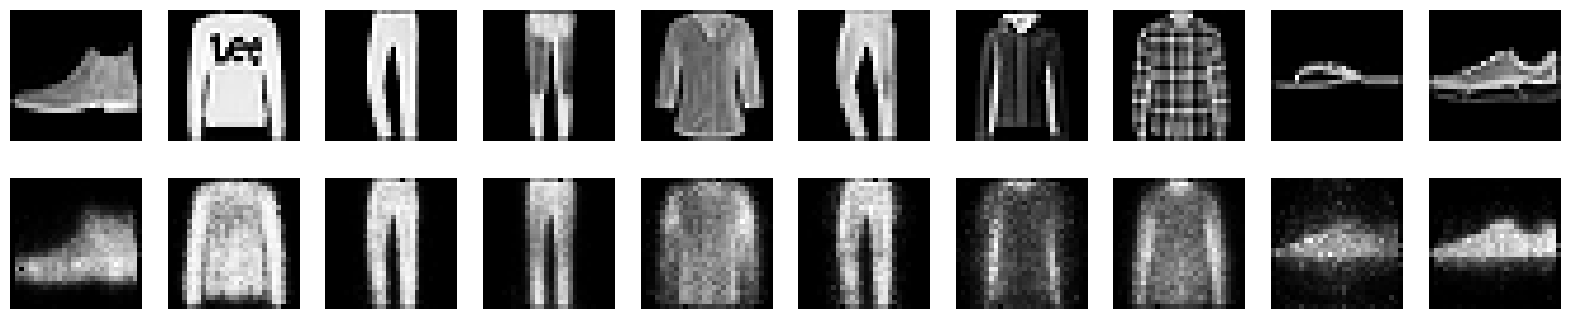

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(autoencoder.forward(x_test[i]).reshape(28, 28), cmap='gray')
    plt.axis('off')

In [33]:
autoencoder2 = NeuralNetwork()
autoencoder2.add_layer(DenseLayer(784, 360, activation_fn=ReLU(), initializer=he_init))
autoencoder2.add_layer(DenseLayer(360, 100, activation_fn=ReLU(), initializer=he_init))
autoencoder2.add_layer(DenseLayer(100, 360, activation_fn=ReLU(), initializer=he_init))
autoencoder2.add_layer(DenseLayer(360, 784, activation_fn=Sigmoid(), initializer=he_init))

autoencoder2.train(x_train, x_train, epochs=15, learning_rate=0.5, loss_function=MeanSquaredError(), batch_size=100)

Epoch: 1, Loss: 0.061
Epoch: 2, Loss: 0.051
Epoch: 3, Loss: 0.042
Epoch: 4, Loss: 0.037
Epoch: 5, Loss: 0.034
Epoch: 6, Loss: 0.028
Epoch: 7, Loss: 0.025
Epoch: 8, Loss: 0.025
Epoch: 9, Loss: 0.022
Epoch: 10, Loss: 0.022


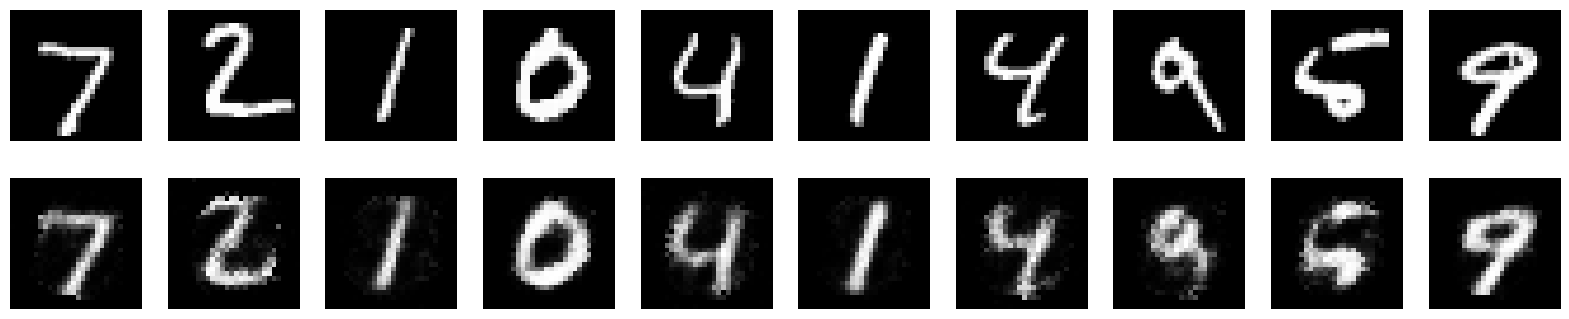

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(autoencoder2.forward(x_test[i]).reshape(28, 28), cmap='gray')
    plt.axis('off')